##**Importing libraries and packages**

In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced data visualization
import warnings  # To handle warnings
warnings.filterwarnings('ignore')  # Ignore warning messages
pd.set_option('display.max_columns', None)  # Display all columns in DataFrames
pd.set_option('display.max_rows', None)  # Display all rows in DataFrames


##**Collecting The Data**

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/EV data.csv")

# Display the first few rows of the DataFrame
df.head()


,Brand,Model,Accel_sec,TopSpeed_km_per_h,Range_km,Efficiency_wh_per_km,FastCharge_km_per_h,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


##**Exploratory Data Analysis (EDA)**

In [ ]:
# Check the shape of data
df.shape

(103, 14)

In [ ]:
# Get the basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 103 non-null    object 
 1   Model                 103 non-null    object 
 2   Accel_sec             103 non-null    float64
 3   TopSpeed_km_per_h     103 non-null    int64  
 4   Range_km              103 non-null    int64  
 5   Efficiency_wh_per_km  103 non-null    int64  
 6   FastCharge_km_per_h   103 non-null    object 
 7   RapidCharge           103 non-null    object 
 8   PowerTrain            103 non-null    object 
 9   PlugType              103 non-null    object 
 10  BodyStyle             103 non-null    object 
 11  Segment               103 non-null    object 
 12  Seats                 103 non-null    int64  
 13  PriceEuro             103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [ ]:
# Let's describe the data
df.describe()

,Accel_sec,TopSpeed_km_per_h,Range_km,Efficiency_wh_per_km,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


Conclusion:


* There are 103 rows and 14 columns
* No null values are found in dataset



##**Feature Engineering**

In [4]:
# Filter rows where 'FastCharge_km_per_h' column is not equal to '-'
df1 = df[df.FastCharge_km_per_h !='-']

# Creates a new DataFrame 'df1'
df1.shape

(98, 14)

In [5]:
# Convert 'FastCharge_km_per_h' column from object type to numeric type in df1
df1.FastCharge_km_per_h=pd.to_numeric(df1.FastCharge_km_per_h)
df1.dtypes

Brand                    object
Model                    object
Accel_sec               float64
TopSpeed_km_per_h         int64
Range_km                  int64
Efficiency_wh_per_km      int64
FastCharge_km_per_h       int64
RapidCharge              object
PowerTrain               object
PlugType                 object
BodyStyle                object
Segment                  object
Seats                     int64
PriceEuro                 int64
dtype: object

In [7]:
df2 = df1
df2.head()

,Brand,Model,Accel_sec,TopSpeed_km_per_h,Range_km,Efficiency_wh_per_km,FastCharge_km_per_h,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [8]:
# Creating a new DataFrame 'X' containing selected columns for further processings
X = df2[['Accel_sec', 'TopSpeed_km_per_h', 'Efficiency_wh_per_km', 'FastCharge_km_per_h', 'Range_km', 'BodyStyle', 'Seats', 'PriceEuro', 'PowerTrain']]

###**Data Visualisation**

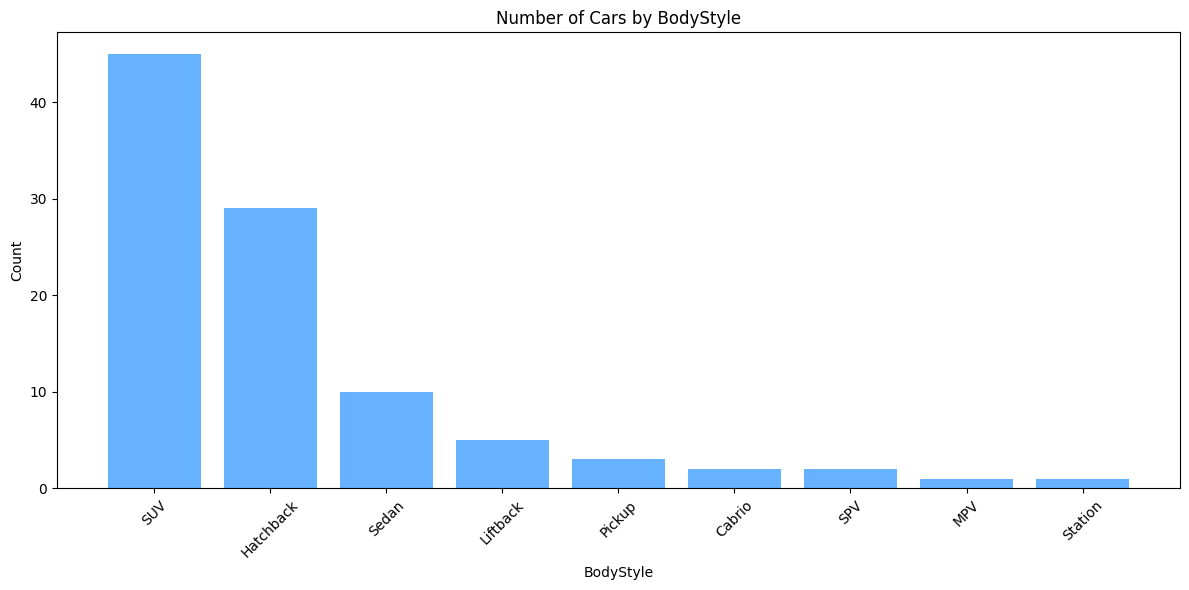

In [ ]:
# Assuming car_counts is the Series containing counts of each BodyStyle category
car_counts = df2['BodyStyle'].value_counts()

# Creating a bar chart
plt.figure(figsize=(12, 6))
plt.bar(car_counts.index, car_counts, color='#66B2FF')

plt.title('Number of Cars by BodyStyle')
plt.xlabel('BodyStyle')
plt.ylabel('Count')

# Rotating x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


It shows SUVs have maximum count in EVs

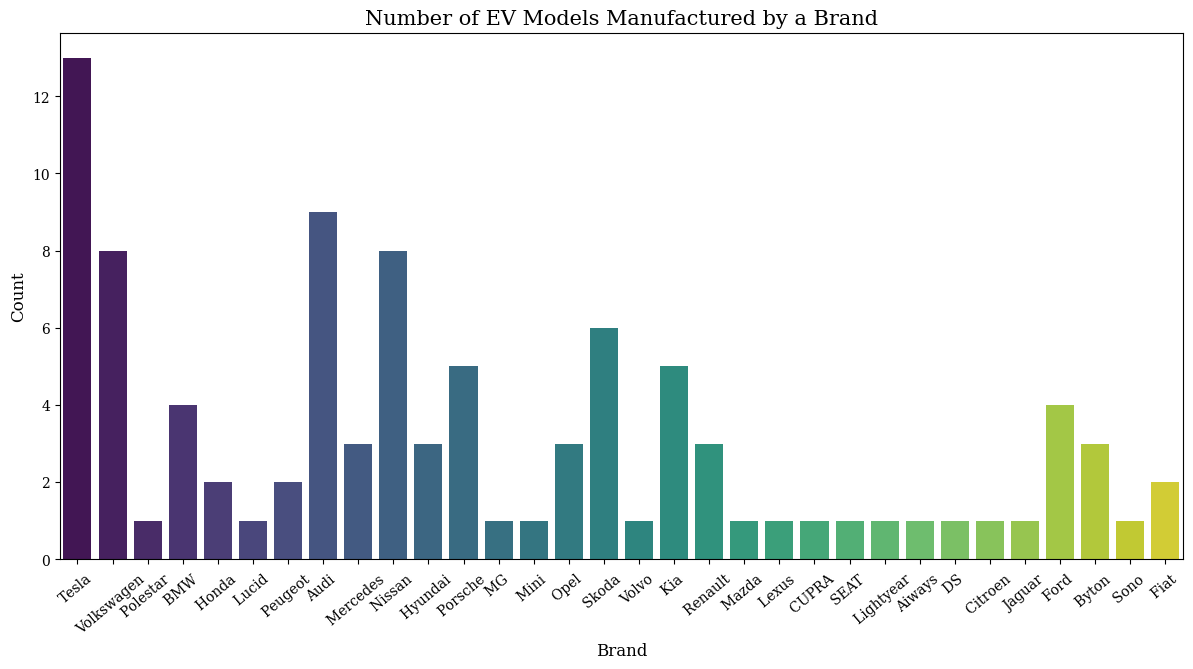

In [ ]:
# brand-wise count of EV models
sns.catplot(data=df2, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market.

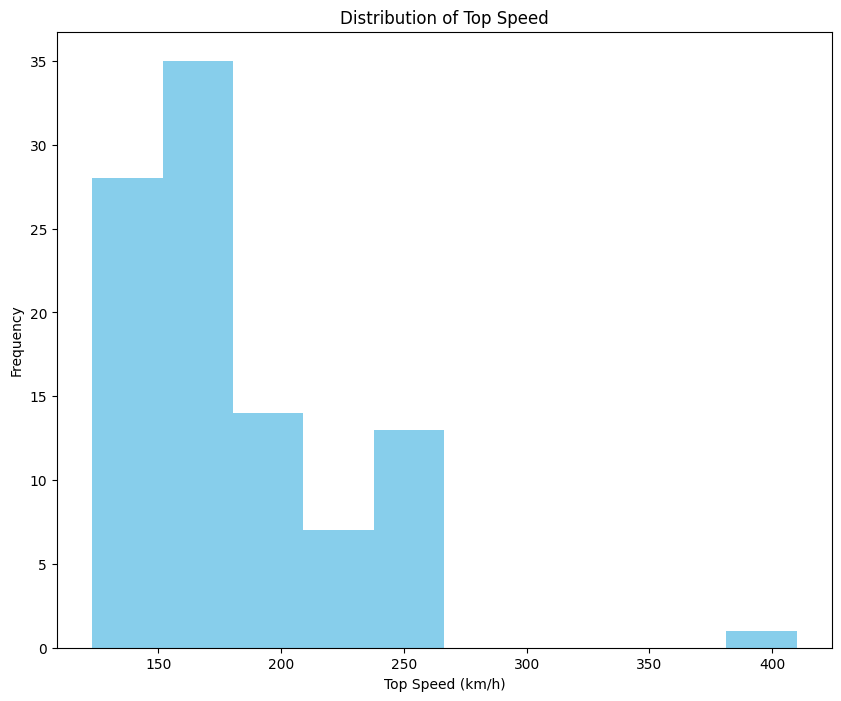

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 8))  # Adjusting the size of the figure

# Customizing the color of the histogram bars
color = 'skyblue'

# Creating the histogram with the custom color
plt.hist(df2['TopSpeed_km_per_h'], bins=10, color=color)

plt.title('Distribution of Top Speed')
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Frequency')

plt.show()

It shows top speed is 175 km/h among most of EVs

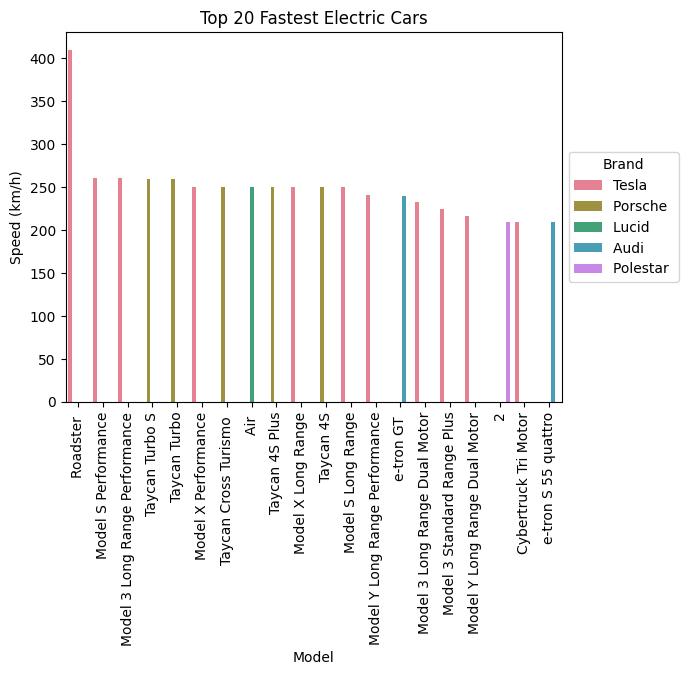

In [ ]:
top_20_fastest = df.sort_values('TopSpeed_km_per_h', ascending=False).head(20)

# Define a custom color palette
colors = sns.color_palette('husl', len(top_20_fastest['Brand'].unique()))

# Create the bar plot with the custom color palette
sns.barplot(data=top_20_fastest, x='Model', y='TopSpeed_km_per_h', hue='Brand', palette=colors)

plt.title('Top 20 Fastest Electric Cars')
plt.xlabel('Model')
plt.ylabel('Speed (km/h)')
plt.legend(title='Brand', loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

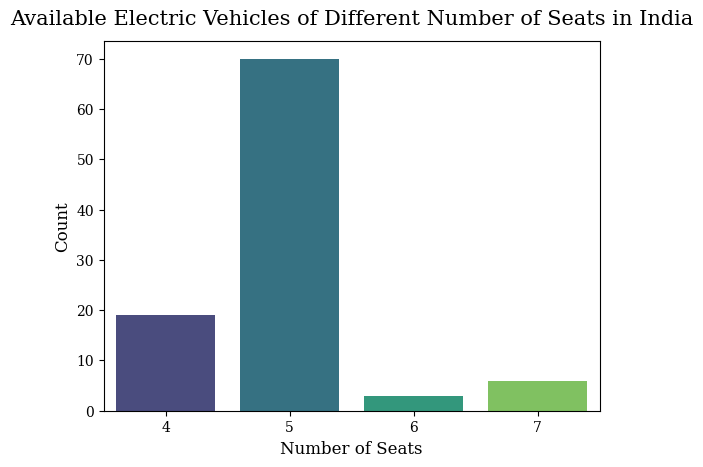

In [ ]:
# EVs of different number of seats from df2
sns.countplot(data=df2, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

EVs with 5 sitters dominate the market while EVs with 6 sitters are less in number.

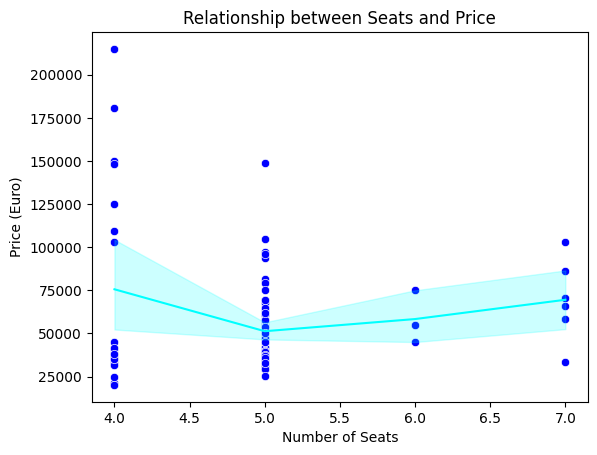

In [ ]:
# Create the scatter plot
sns.scatterplot(data=df2, x='Seats', y='PriceEuro', color='blue', marker='o')

# Create the line plot
sns.lineplot(data=df2, x='Seats', y='PriceEuro', color='cyan')

# Set the plot title and axis labels
plt.title('Relationship between Seats and Price')
plt.xlabel('Number of Seats')
plt.ylabel('Price (Euro)')

# Show the plot
plt.show()

It shows EVs with four seats are quite expensive.

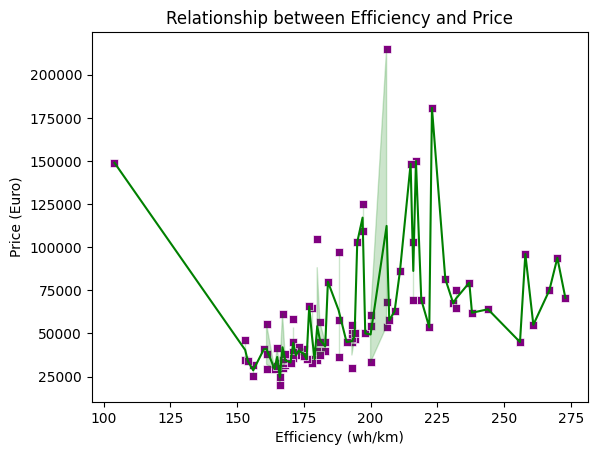

In [ ]:
# Create the scatter plot
sns.scatterplot(data=df2, x='Efficiency_wh_per_km', y='PriceEuro', color='purple', marker='s')

# Create the line plot
sns.lineplot(data=df2, x='Efficiency_wh_per_km', y='PriceEuro', color='green')

# Set the plot title and axis labels
plt.title('Relationship between Efficiency and Price')
plt.xlabel('Efficiency (wh/km)')
plt.ylabel('Price (Euro)')

# Show the plot
plt.show()

It shows EVs with 200 wh/km of efficiency are most expensive.

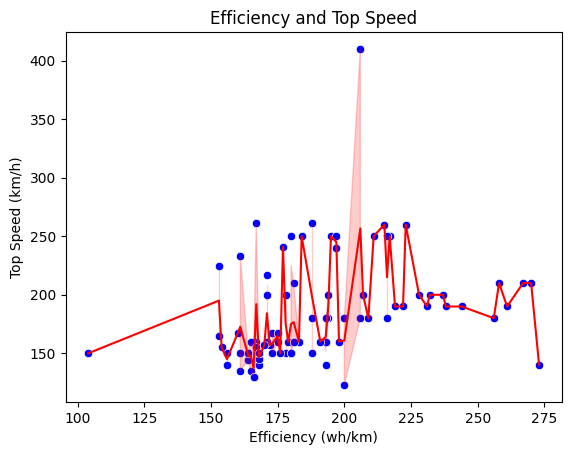

In [ ]:
# Create the scatter plot
sns.scatterplot(data=df2, x='Efficiency_wh_per_km', y='TopSpeed_km_per_h', color='blue', marker='o')

# Create the line plot
sns.lineplot(data=df2, x='Efficiency_wh_per_km', y='TopSpeed_km_per_h', color='red')

# Set the plot title and axis labels
plt.title('Efficiency and Top Speed')
plt.xlabel('Efficiency (wh/km)')
plt.ylabel('Top Speed (km/h)')

# Show the plot
plt.show()

It shows EVs with efficiency of 200 wh/km have top speed.

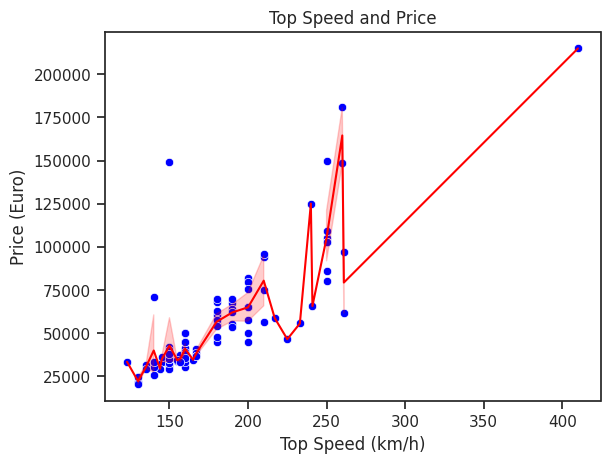

In [ ]:
# Set the style of the plot
sns.set(style='ticks')

# Create the scatter plot
sns.scatterplot(data=df2, x='TopSpeed_km_per_h', y='PriceEuro', color='blue', marker='o')

# Add a line plot to connect the highest speed and price points
sns.lineplot(data=df2, x='TopSpeed_km_per_h', y='PriceEuro', color='red')

# Set the plot title and axis labels
plt.title('Top Speed and Price')
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Price (Euro)')

# Show the plot
plt.show()

It shows EVs with speed of 400 km/h are most expensive.

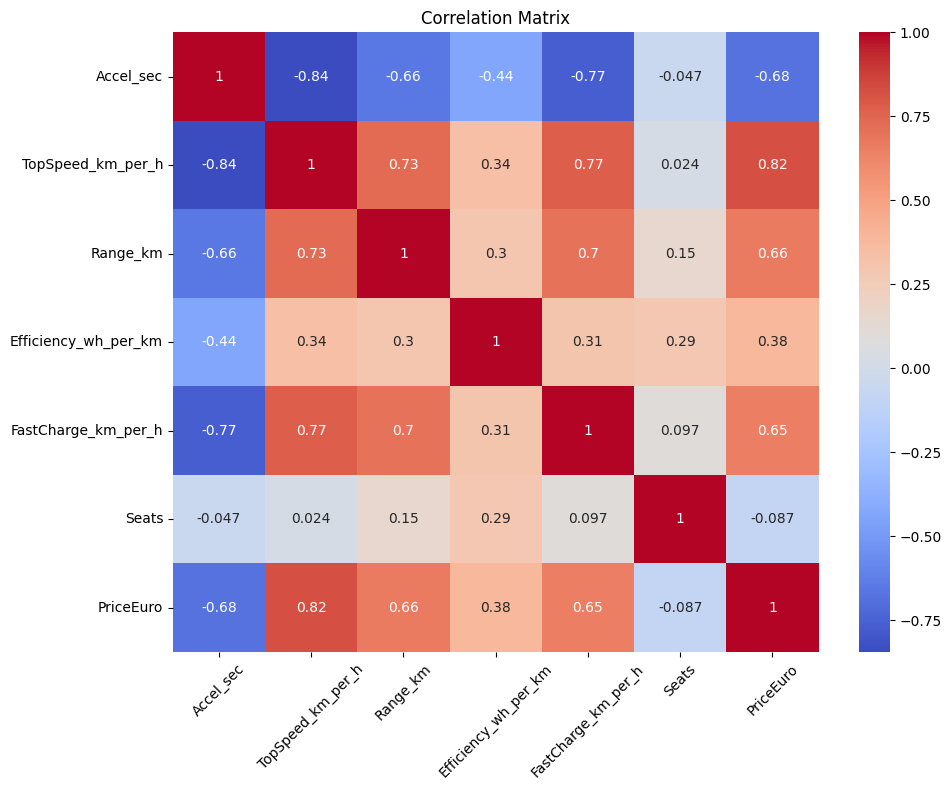

In [9]:
plt.figure(figsize=(10, 8))  # Set the figure size to 10x8 inches
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Define a custom color map

sns.heatmap(df2.corr(), annot=True, cmap=cmap) #Plotting heatmap

plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

This plot shows correlation between various features.

##**Label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(data,column):
    label_encoder=LabelEncoder()
    return label_encoder.fit_transform(data[column].astype(str))

In [ ]:
# Encoding categorical columns
df2['PowerTrain']= label_encoder(df2,'PowerTrain')
df2['BodyStyle']= label_encoder(df2,'BodyStyle')

In [ ]:
df2.head()

,Brand,Model,Accel_sec,TopSpeed_km_per_h,Range_km,Efficiency_wh_per_km,FastCharge_km_per_h,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,0,Type 2 CCS,7,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,2,Type 2 CCS,1,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,0,Type 2 CCS,2,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,2,Type 2 CCS,6,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,2,Type 2 CCS,1,B,4,32997


In [ ]:
# Dropping redundant columns

df2 = df2.drop('Model',axis=1)
df2 = df2.drop('RapidCharge',axis=1)
df2 = df2.drop('Segment',axis=1)
df2 = df2.drop('PlugType',axis=1)
df2 = df2.drop('Brand',axis=1)

In [ ]:
df2.head()

,Accel_sec,TopSpeed_km_per_h,Range_km,Efficiency_wh_per_km,FastCharge_km_per_h,PowerTrain,BodyStyle,Seats,PriceEuro
0,4.6,233,450,161,940,0,7,5,55480
1,10.0,160,270,167,250,2,1,5,30000
2,4.7,210,400,181,620,0,2,5,56440
3,6.8,180,360,206,560,2,6,5,68040
4,9.5,145,170,168,190,2,1,4,32997


##**K- Means Clustering Model**

## **Scaling**

In [ ]:
# Scaling the data
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df2)
df3 = pd.DataFrame(robust_df, columns =df2.columns)

In [ ]:
df3.shape

(98, 9)

In [ ]:
df3.head()

,Accel_sec,TopSpeed_km_per_h,Range_km,Efficiency_wh_per_km,FastCharge_km_per_h,PowerTrain,BodyStyle,Seats,PriceEuro
0,-0.701299,1.32,0.672269,-0.526316,1.754386,-1.0,0.2,0.0,0.344001
1,0.701299,-0.14,-0.537815,-0.368421,-0.666667,1.0,-1.0,0.0,-0.492368
2,-0.675325,0.86,0.336134,0.000000,0.631579,-1.0,-0.8,0.0,0.375513
3,-0.129870,0.26,0.067227,0.657895,0.421053,1.0,0.0,0.0,0.756278
4,0.571429,-0.44,-1.210084,-0.342105,-0.877193,1.0,-1.0,-1.0,-0.393993


##**Implementing PCA**

In [ ]:
# applying Principle Component Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X_pca = pca.fit_transform(df3)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.524421,0.343335,1.112460,-0.951500,-1.177873,0.083745,0.354169,0.301357,0.343067
1,-1.914596,0.422757,0.381075,0.421939,0.393298,-0.108871,-0.491865,-0.008621,0.211986
2,0.857693,0.121990,0.337084,-0.716231,-0.274491,0.655474,-0.284718,0.228446,-0.053687
3,0.142534,0.042519,0.304407,1.238697,-0.158814,-0.563571,0.088023,0.124472,-0.100413
4,-2.285775,0.983260,-0.569861,0.565195,-0.031886,-0.012917,-0.444279,0.032323,0.005020


##**Finding number of clusters using Elbow Method**

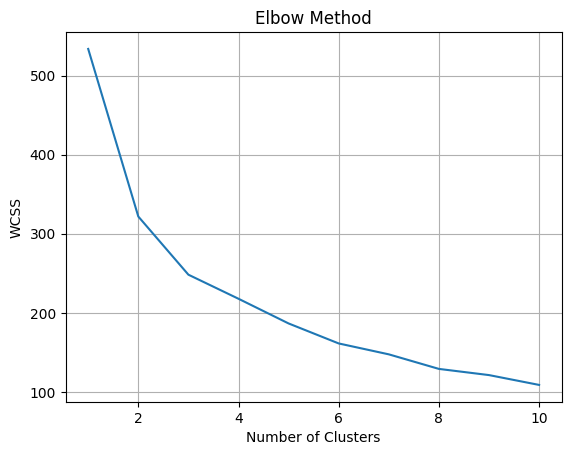

In [ ]:
from sklearn.cluster import KMeans

# Determine the number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

## **Applying the KMeans Clustering algorithm**

In [ ]:
# Perform K-means clustering algo. with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

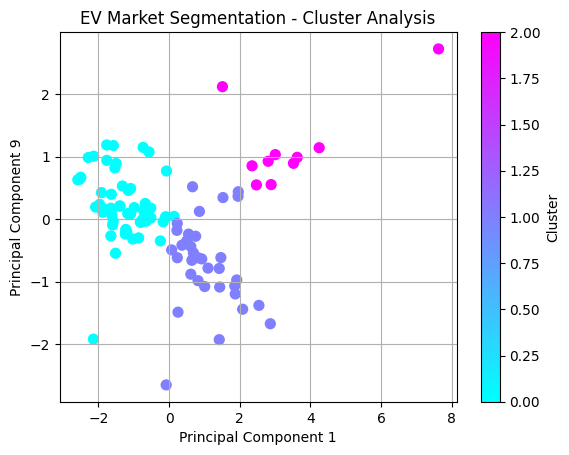

In [ ]:
# Add the cluster labels to the dataset
df2['Clusters'] = kmeans.labels_

# Define a custom color and size
color_map = 'cool'  # Change the color map as desired
marker_size = 50  # Change the marker size as desired

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df2['Clusters'], cmap=color_map, s=marker_size)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 9')
plt.title('EV Market Segmentation - Cluster Analysis')
plt.colorbar(label='Cluster')
plt.grid()

plt.show()

##**Making Predictions**

In [ ]:
kmeans_predict=KMeans(n_clusters=3,random_state=123)
clusters=kmeans_predict.fit_predict(df2)
X["Clusters"]=clusters

In [ ]:
X.head()

,Accel_sec,TopSpeed_km_per_h,Efficiency_wh_per_km,FastCharge_km_per_h,Range_km,BodyStyle,Seats,PriceEuro,PowerTrain,Clusters
0,4.6,233,161,940,450,Sedan,5,55480,All Wheel Drive,1
1,10.0,160,167,250,270,Hatchback,5,30000,Rear Wheel Drive,1
2,4.7,210,181,620,400,Liftback,5,56440,All Wheel Drive,1
3,6.8,180,206,560,360,SUV,5,68040,Rear Wheel Drive,0
4,9.5,145,168,190,170,Hatchback,4,32997,Rear Wheel Drive,1


In [ ]:
X["Clusters"].value_counts()

1    66
0    26
2     6
Name: Clusters, dtype: int64

It shows cluster(0) are 26 , cluster(1) are 66 and cluster(2) are 6 in count.

##**Bifurcating the data according to the cluster**

In [ ]:
Cluster_0=X[df2.Clusters==0]
Cluster_1=X[df2.Clusters==1]
Cluster_2=X[df2.Clusters==2]
Cluster_3=X[df2.Clusters==3]

In [ ]:
# BodyStyle prefrence
[Cluster_0["BodyStyle"].value_counts().head(),
Cluster_1["BodyStyle"].value_counts().head(),
Cluster_2["BodyStyle"].value_counts().head(),
Cluster_3["BodyStyle"].value_counts().head()]

[Hatchback    26
 SUV          23
 Sedan         1
 Liftback      1
 MPV           1
 Name: BodyStyle, dtype: int64,
 SUV          22
 Sedan         3
 Pickup        3
 Hatchback     3
 Liftback      2
 Name: BodyStyle, dtype: int64,
 Sedan       6
 Liftback    2
 Cabrio      1
 Station     1
 Name: BodyStyle, dtype: int64,
 Series([], Name: BodyStyle, dtype: int64)]

It shows Hatchback and SUVs are most preferred EVs.

In [ ]:
[Cluster_0["PowerTrain"].value_counts().head(),
Cluster_1["PowerTrain"].value_counts().head(),
Cluster_2["PowerTrain"].value_counts().head(),
Cluster_3["PowerTrain"].value_counts().head()]

[Front Wheel Drive    35
 Rear Wheel Drive     19
 Name: PowerTrain, dtype: int64,
 All Wheel Drive      31
 Rear Wheel Drive      2
 Front Wheel Drive     1
 Name: PowerTrain, dtype: int64,
 All Wheel Drive    10
 Name: PowerTrain, dtype: int64,
 Series([], Name: PowerTrain, dtype: int64)]

Front Wheel Drive and All Wheel Drive are more preferred

In [ ]:
[Cluster_0["Seats"].value_counts().head(),
Cluster_1["Seats"].value_counts().head(),
Cluster_2["Seats"].value_counts().head(),
Cluster_3["Seats"].value_counts().head()]

[5    41
 4    12
 7     1
 Name: Seats, dtype: int64,
 5    26
 7     5
 6     3
 Name: Seats, dtype: int64,
 4    7
 5    3
 Name: Seats, dtype: int64,
 Series([], Name: Seats, dtype: int64)]

5 seats EVs are more preferred.

In [ ]:
[Cluster_0["PriceEuro"].value_counts().head(),
Cluster_1["PriceEuro"].value_counts().head(),
Cluster_2["PriceEuro"].value_counts().head(),
Cluster_3["PriceEuro"].value_counts().head()]

[45000    3
 30000    2
 35000    2
 40000    2
 36837    2
 Name: PriceEuro, dtype: int64,
 45000    3
 55000    2
 65000    2
 57500    2
 55480    1
 Name: PriceEuro, dtype: int64,
 105000    1
 180781    1
 125000    1
 102945    1
 149000    1
 Name: PriceEuro, dtype: int64,
 Series([], Name: PriceEuro, dtype: int64)]

EVs of range 45000 Euro are more preferred.